step-1_find-faces.py
根据之前的说法，这个代码的用处是找到人脸，这样我们才能使用人脸进行进一步的识别

In [2]:
import sys
import dlib
from skimage import io

# Take the image file name from the command line
# file_name = sys.argv[1]
file_name = "test_picture/1.jpg"

# Create a HOG face detector using the built-in dlib class
face_detector = dlib.get_frontal_face_detector()

win = dlib.image_window()

# Load the image into an array
image = io.imread(file_name)

# Run the HOG face detector on the image data.
# The result will be the bounding boxes of the faces in our image.
detected_faces = face_detector(image, 1)

print("I found {} faces in the file {}".format(len(detected_faces), file_name))

# Open a window on the desktop showing the image
win.set_image(image)

# Loop through each face we found in the image
for i, face_rect in enumerate(detected_faces):

	# Detected faces are returned as an object with the coordinates 
	# of the top, left, right and bottom edges
	print("- Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i, face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()))

	# Draw a box around each face we found
	win.add_overlay(face_rect)
	        
# Wait until the user hits <enter> to close the window	        
dlib.hit_enter_to_continue()

I found 1 faces in the file test_picture/1.jpg
- Face #0 found at Left: 233 Top: 357 Right: 788 Bottom: 911


I found 1 face(s) in this photograph.


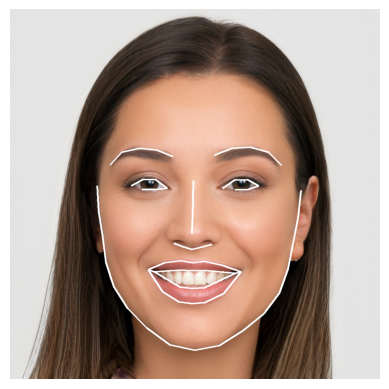

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt 
from PIL import Image, ImageDraw
import face_recognition

# 通过PIL加载图片
image = face_recognition.load_image_file("test_picture/1.jpg")

# 找到图像中所有人脸的所有面部特征，返回字典
face_landmarks_list = face_recognition.face_landmarks(image)

# 发现人脸数
print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# 创建展示结果的图像
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

# 绘制关键点
for face_landmarks in face_landmarks_list:

    # 打印此图像中每个面部特征的位置
    # for facial_feature in face_landmarks.keys():
       # print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # 用一条线勾勒出图像中的每个面部特征
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=5)


# jupyter 绘图
# pil_image.show()
plt.imshow(pil_image)
plt.axis('off')    
plt.show()